<a href="https://colab.research.google.com/github/HuyenNguyenHelen/LING-5412/blob/main/Assignment3_LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries that will be used 
import numpy as np
import tarfile
import glob
import re
import pandas as pd
import nltk
nltk.download('wordnet')
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the dataset

In [2]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/scale_data.tar.gz

--2021-10-16 01:19:48--  http://www.cs.cornell.edu/people/pabo/movie-review-data/scale_data.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4029756 (3.8M) [application/x-gzip]
Saving to: ‘scale_data.tar.gz.6’

scale_data.tar.gz.6 100%[===================>]   3.84M  2.47MB/s    in 1.6s    

2021-10-16 01:19:50 (2.47 MB/s) - ‘scale_data.tar.gz.6’ saved [4029756/4029756]



In [3]:
# Untar the dataset
my_tar = tarfile.open('/content/scale_data.tar.gz')
my_tar.extractall('/content/') 
my_tar.close()


In [4]:
# Reformatting the dataset into a single dataframe for our convinience
id, review, rating, cl_3, cl_4 = [],[],[],[], []
for root in glob.glob ('/content/scaledata/*'):
  for path in glob.glob(root+'/*'): 
      fo = open(path)
      doc = fo.read()
      if 'id' in path:
        id.extend(doc.split('\n'))
      elif 'subj' in path:
          review.extend(doc.split('\n'))
      elif 'rating' in path:
        rating.extend(doc.split('\n'))
      elif '3class' in path:
        cl_3.extend(doc.split('\n'))
      else:
        cl_4.extend(doc.split('\n'))

print (len(id), len(review), len(rating), len(cl_3), len(cl_4))
df = pd.DataFrame(zip(id, review, rating, cl_3, cl_4), columns = ['id', 'review', 'rating', '3class', '4class'])

# Using these 2 columns to build a dataset for a rating-based regressor
new_df = df[['review', 'rating']].dropna()
new_df = new_df[new_df['rating'] != '']
new_df['rating'] =new_df['rating'].apply(lambda x: float(x))

# Using these 2 columns to build a dataset for a 3-class classifier
data = df[['review', '3class']].dropna()
data = data[data['3class']!='']
data




5010 5010 5010 5010 5010


,review,3class
0,"in my opinion , a movie reviewer's most import...",0
1,"you can watch this movie , that is based on a ...",0
2,"this is asking a lot to believe , and though i...",0
3,no heroes and no story are the main attributes...,0
4,"this is not an art movie , yet i saw it an art...",0
...,...,...
5004,the conventional wisdom is that movie sequels ...,2
5005,nicolas roeg's mesmerizing 1971 film walkabout...,2
5006,the movie air force one should require a docto...,2
5007,""" well , jones , at least you haven't forgotte...",2


# Splitting the data and vectorizing it

In [5]:
# Spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split (data['review'], data['3class'] , train_size = 0.8, random_state = 42, shuffle = True, stratify=data['3class'])
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (4004,) (4004,)
Shapes of X_test, y_test:  (1002,) (1002,)


In [6]:
# Vectorizing the documents
vectorizer = CountVectorizer(binary = True)
X_train = vectorizer.fit_transform(X_train.to_list())
X_test = vectorizer.transform(X_test.to_list())
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (4004, 38629) (4004,)
Shapes of X_test, y_test:  (1002, 38629) (1002,)


# Linear models

### Default model

In [8]:

def printing_eval_scores (y_true, y_pred, report=''):
  accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
  precision = sklearn.metrics.precision_score(y_true, y_pred, average = 'weighted')
  recall = sklearn.metrics.recall_score(y_true, y_pred, average = 'weighted')
  f1 = sklearn.metrics.f1_score(y_true, y_pred, average = 'weighted')
  print('accuracy score: {:.3f}'.format(accuracy))
  print('precision score: {:.3f}'.format(precision))
  print('recall score: {:.3f}'.format(recall))
  print('F1 score: {:.3f}'.format(f1))
  if report is True:
    print(classification_report(y_true, y_pred))
  else:
    pass
  return accuracy, precision, recall, f1

def training (penalty=''): 
  if penalty is True:
    SGD = SGDClassifier( penalty=penalty, shuffle=True).fit(X_train, y_train)
  else:
    SGD = SGDClassifier(shuffle=True).fit(X_train, y_train)
  y_pred = SGD.predict(X_test)
  ## on training set
  print('Model performance on training set:')
  printing_eval_scores (y_train, SGD.predict(X_train), report = False)
  ## on test set
  print('\nModel performance on test set:')
  printing_eval_scores (y_test, y_pred, report=True)


print('--------default sgd model-----------')
training (penalty='default')

penalties = ['l1','l2']
for penalty in penalties:
  print('\n-------training linear model with penalty = {}'.format(penalty ))
  training (penalty=penalty)

--------default sgd model-----------
Model performance on training set:
accuracy score: 1.000
precision score: 1.000
recall score: 1.000
F1 score: 1.000

Model performance on test set:
accuracy score: 0.658
precision score: 0.657
recall score: 0.658
F1 score: 0.657
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       240
           1       0.60      0.58      0.59       383
           2       0.73      0.73      0.73       379

    accuracy                           0.66      1002
   macro avg       0.65      0.66      0.66      1002
weighted avg       0.66      0.66      0.66      1002


-------training linear model with penalty = l1
Model performance on training set:
accuracy score: 1.000
precision score: 1.000
recall score: 1.000
F1 score: 1.000

Model performance on test set:
accuracy score: 0.664
precision score: 0.664
recall score: 0.664
F1 score: 0.664
              precision    recall  f1-score   support

           0       0.

**1. What is the performance of the trained classifier on the test dataset?**
The model has the overfitting issue. Although the model got maximum performance in the training set, it only got from 0.64 to 0.67 on F1 score. 

**2. Which regularization is performing the best on the test dataset: L1 or L2? Use the default settings.**
As shown above, the default model with L1 regulazation achieved a better result, with a F1 score of 0.664 on the test set while using L2 regulation, the model got a slighly lower F1 score, 0.648.

### Searching the best parameter

In [17]:
# Set the parameters by cross-validation
tuned_parameters = [{'alpha': [i for i in np.arange (0.0001, 0.01, 0.001 )]}] #, 'loss': ['log','hinge', 'perceptron']}]

regularizations = ['l1', 'l2']
for l in regularizations:
  print ('---------with {}----------'.format(l))
  clf = GridSearchCV(SGDClassifier(penalty = l, shuffle=True), tuned_parameters, scoring='f1_macro', cv = 5, refit = True, n_jobs = -1 )
  clf.fit(X_train, y_train)
  print('Best parameters set found on development set: {}'.format(clf.best_params_))
  y_pred =  clf.predict(X_test)
  printing_eval_scores (y_test, y_pred, report=True)



---------with L1----------
Best parameters set found on development set: {'alpha': 0.0001}
accuracy score: 0.647
precision score: 0.645
recall score: 0.647
F1 score: 0.646
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       240
           1       0.58      0.58      0.58       383
           2       0.70      0.74      0.72       379

    accuracy                           0.65      1002
   macro avg       0.65      0.64      0.64      1002
weighted avg       0.65      0.65      0.65      1002

---------with L2----------
Best parameters set found on development set: {'alpha': 0.0091}
accuracy score: 0.648
precision score: 0.648
recall score: 0.648
F1 score: 0.648
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       240
           1       0.58      0.59      0.59       383
           2       0.73      0.73      0.73       379

    accuracy                           0.65      1002
   

**3. We will use cross-validation to get the best value of the α parameter for regularization. What is the value of the α? Is regularization important? You can use 5-fold cross validation. Note that the cross-validation should be used ONLY on the training dataset.**

We used gridsearch function built in Sklearn to search for the best α from 0.0001 to 0.01, with 5 folds on training set. We found that with L2 regularization, the model got the best performance on F1 score (0.648) with ***α=0.0091***. We also found that regularization affects selection of the best α because with L1 regularization, the best α is ***α=0.0001*** ; however, it seems L1 and L2 resulted in quite similar performances.



**(4) What kind of multi-class strategy does SGDClassifier use?***

SGDClassifier used “one versus all” (OVA) strategy to handle multi-class strategy. For each of K classes, the binary classifier will try to predict that class and the rest other K-1 classes.

**5. In any regularization: which features are ranked the highest? You can sort the feature weights.**

In [18]:
# Printing features with highest weights.
best_SGD = SGDClassifier( penalty='l2',  shuffle=True, alpha=0.0091).fit(X_train, y_train)
y_pred = best_SGD.predict(X_test)
weights = best_SGD.coef_
weights

array([[ 0.01614026, -0.03873663, -0.03550857, ..., -0.00080701,
        -0.00161403,  0.00080701],
       [ 0.04432735, -0.04116111, -0.01899744, ..., -0.02005285,
         0.00633248, -0.01213725],
       [-0.08745872,  0.062593  ,  0.05487606, ...,  0.01800621,
         0.00342975,  0.        ]])

In [20]:
features = vectorizer.get_feature_names()

feature_weights = {}
for i in range(len(weights)):
  print('\n==============================================')
  print ('\nclass: {}'.format(i+1))
  for w in range(len(weights[i])):
     feature_weights[features[w]] = weights[i][w] #np.abs
  # Sorting the dictionary in descending order
  sorted_feature_weights = {k:v for k, v in sorted(feature_weights.items(), key = lambda item: item[1], reverse=True)}

  # Print the weights learned for each class
  print('10 most important features (in descending order): ')
  for k, v in list(sorted_feature_weights.items())[:20]:
    print ('{}: {:.5f}'. format(k,v))




class: 1
10 most important features (in descending order): 
bad: 0.28165
boring: 0.25744
ridiculous: 0.24614
awake: 0.23807
watchable: 0.22112
suppose: 0.22031
dull: 0.21628
unfunny: 0.21224
inane: 0.20740
failed: 0.19449
worst: 0.19288
flat: 0.18238
routine: 0.18077
poorly: 0.17996
remotely: 0.17916
sitcom: 0.17431
contrived: 0.17109
peter: 0.16786
attempt: 0.16786
wasted: 0.16786


class: 2
10 most important features (in descending order): 
problems: 0.29393
able: 0.26860
unfortunately: 0.26333
problem: 0.25752
fits: 0.23377
ve: 0.23272
leads: 0.23008
nice: 0.22797
albeit: 0.22744
add: 0.22691
myself: 0.22639
marriage: 0.22428
changes: 0.22216
thumbs: 0.22111
entertaining: 0.21847
though: 0.21636
cute: 0.21583
interesting: 0.20317
cool: 0.19842
in: 0.19525


class: 3
10 most important features (in descending order): 
great: 0.23580
traditional: 0.22636
perfect: 0.22036
intelligent: 0.21522
delightful: 0.21179
favorite: 0.21179
turns: 0.19807
terrific: 0.19807
strongly: 0.19635
wond

The above output includes the most important features according to weights. The higher learned weights, the more important the features are. Looking at the most important features in each class, we can see they make a lot of sense. For example, the most important features in the class 0 (negative) are negative sentiment words such as bad, boring, ridiculous, dull, unfunny, failed, worst, etc. while the positive class (class 2) includes very positive words as the most important features such as: great, perfect, intelligent, delightful,
favorite, terrific, strongly, wonderfully, intensity, etc. The neutral class contains some possitive words, and some negative words.

**Q6. How does the hyperplane of the classifier look like?**
Since there are 38629 features used in the model, it's hard to plot a hyperlane with these high dimensions. One way is using pca to reduce the number of features to 2 dimensions. However, for convinience, we can use decision_function, a function of SGD model in sklearn, to examine the distance of that samples to the hyperplane. 

In [21]:
import seaborn as sns
hyperplane = best_SGD.decision_function(X_train).T
hyperplane

array([[-1.17831983, -1.09923255, -2.62206615, ..., -2.74634616,
        -1.27677542, -1.30582789],
       [ 0.935393  ,  0.95069649, -1.5506326 , ..., -1.12899506,
        -1.13374441, -2.45512164],
       [-1.00311192, -1.01683094,  2.39748871, ...,  1.17392414,
         1.14991586,  1.58120737]])

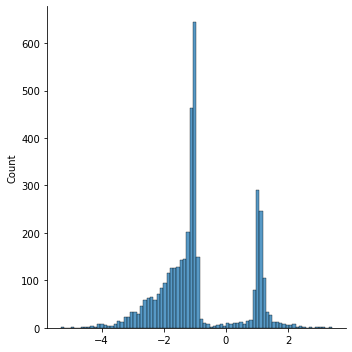

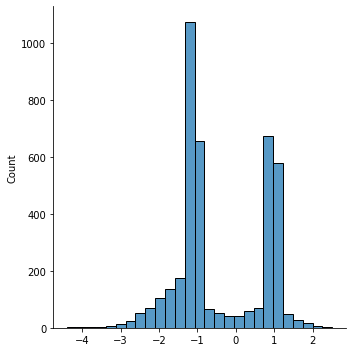

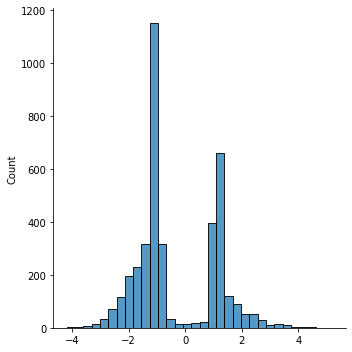

In [23]:
for i in range(3):
  sns.displot(hyperplane[i], kind = 'hist', legend=True)


The histograms show the distribution of distances from data points to the hypelane. The negative and positive distances means which sides of the hypelane the data points belong to. It seems very few data points close to the hypelane. 

**Model with log loss function**

In [24]:
log_SGD = SGDClassifier(loss='log', penalty='l2',  shuffle=True, alpha=0.0091).fit(X_train, y_train)
y_pred = log_SGD.predict(X_test)
printing_eval_scores (y_test, y_pred, report=True)


accuracy score: 0.667
precision score: 0.677
recall score: 0.667
F1 score: 0.667
              precision    recall  f1-score   support

           0       0.73      0.56      0.63       240
           1       0.58      0.69      0.63       383
           2       0.74      0.72      0.73       379

    accuracy                           0.67      1002
   macro avg       0.68      0.65      0.66      1002
weighted avg       0.68      0.67      0.67      1002



(0.6666666666666666,
 0.6770963176166473,
 0.6666666666666666,
 0.6673483560745256)

Compared the best model (F1 = 0.648) we built using loss = 'hinge' (SVM loss), the model with loss = 'log' (Logistic regression) performs better, with a F1 score = 0.667.

**8. Building a linear model to compare the result**

In [25]:
new_df['rating'].describe()

count    5006.000000
mean        0.581422
std         0.181725
min         0.000000
25%         0.490000
50%         0.600000
75%         0.700000
max         1.000000
Name: rating, dtype: float64

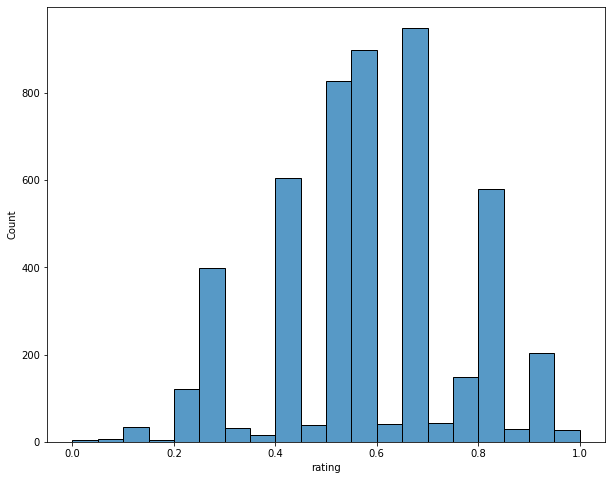

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(data = new_df, x = 'rating', bins = 20)
plt.show()


In [27]:
# Spliting the dataset for training and testing
X_train_, X_test_, y_train_, y_test_ = train_test_split (new_df['review'], new_df['rating'] , train_size = 0.8, random_state = 42, shuffle = True)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (4004, 38629) (4004,)
Shapes of X_test, y_test:  (1002, 38629) (1002,)


In [28]:
# Vectorizing the documents
vectorizer = CountVectorizer(binary = True)
X_train_ = vectorizer.fit_transform(X_train_.to_list())
X_test_ = vectorizer.transform(X_test_.to_list())
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (4004, 38629) (4004,)
Shapes of X_test, y_test:  (1002, 38629) (1002,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(X_train_, y_train_)
y_pred = reg.predict(X_test_)
print('mean squared error: {:.3f}'.format(mean_squared_error(y_test_, y_pred)))
print('r2 score: {:.3f}'.format(r2_score(y_test_, y_pred)))

mean squared error: 0.019
r2 score: 0.413


Above is the performance of the linear regression model. The Mean Squared Error is close to 0 (0.019), however, the R2 is not good enough, 0.413. However, given different evaluation matrix, it is very hard to compare the performance of the regression model with the classification model we built before. Therefore, we can use the annotation scheme provided in README file to convert continous values in y_predicted into three categories as we had before.

In [30]:
# Encoding the y_predicted (continous values) into 3 classes
y_pred_cl = []
for i in y_pred:
  if i <=0.4:
    y_pred_cl.append("0")
  elif i >=0.7:
    y_pred_cl.append("2")
  else:
    y_pred_cl.append("1")
printing_eval_scores(y_test, y_pred_cl, report = True)

accuracy score: 0.347
precision score: 0.330
recall score: 0.347
F1 score: 0.315
              precision    recall  f1-score   support

           0       0.22      0.15      0.18       240
           1       0.38      0.63      0.47       383
           2       0.35      0.18      0.24       379

    accuracy                           0.35      1002
   macro avg       0.32      0.32      0.30      1002
weighted avg       0.33      0.35      0.32      1002



(0.3473053892215569,
 0.33029549036644185,
 0.3473053892215569,
 0.31539444137412953)

Looking at the performance of the model on F1 score, we can see the regression model performed much worse than the classification models we built before. This indicates an inconsistence between rating, and the classes assigned accordingly.

# Implementing minibatches


In [37]:
from sklearn.linear_model import SGDClassifier
import random
log_SGD_2 = SGDClassifier(loss='log', penalty='l2',  shuffle=True, alpha=0.0081).fit(X_train, y_train)
n_iter = 10
batch_size = 32
F1_tr = []
F1_test = []
for n in range(n_iter):
  print ('----------iteration {}-----------'.format(n+1))
  n_instances, n_features = X_train.shape
  i=0 
  while i<= round(n_instances/batch_size):
    m = batch_size * i
    n = m + batch_size
    log_SGD_2.partial_fit(X_train[m:n], y_train[m:n], classes=np.unique(y_train))
    i+=1    
  y_pred = log_SGD_2.predict(X_test)
  print('Model performance on training set:')
  _, _,_, f1_tr = printing_eval_scores (y_train, log_SGD_2.predict(X_train), report = False)
  print('\nModel performance on test set:')
  _, _,_, f1_test = printing_eval_scores (y_test, y_pred, report = True)
  F1_tr.append (f1_tr)
  F1_test.append (f1_test)

max_f1 = max(F1_test)
idx_max_f1 = F1_test.index(max(F1_test))
print('Best performance is in iteration {}: F1 = {:.3f}'.format(idx_max_f1 +1, max_f1))

----------iteration 1-----------
Model performance on training set:
accuracy score: 0.968
precision score: 0.969
recall score: 0.968
F1 score: 0.968

Model performance on test set:
accuracy score: 0.666
precision score: 0.678
recall score: 0.666
F1 score: 0.666
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       240
           1       0.58      0.68      0.63       383
           2       0.73      0.73      0.73       379

    accuracy                           0.67      1002
   macro avg       0.69      0.65      0.66      1002
weighted avg       0.68      0.67      0.67      1002

----------iteration 2-----------
Model performance on training set:
accuracy score: 0.968
precision score: 0.970
recall score: 0.968
F1 score: 0.968

Model performance on test set:
accuracy score: 0.663
precision score: 0.675
recall score: 0.663
F1 score: 0.663
              precision    recall  f1-score   support

           0       0.76      0.54      0